# Assignment7B_HCordoba

## Importing the Code

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



Wheretosavemyfiles=r"C:\Users\gelli\Desktop\POLIMI FIRST YEAR\ENERGY AND ENVIRONMENTAL SYSTEM FOR BUILDINGS\Files solved in Python"
os.chdir(Wheretosavemyfiles)
Externalfilesfolder= r"C:\Users\gelli\Desktop\POLIMI FIRST YEAR\ENERGY AND ENVIRONMENTAL SYSTEM FOR BUILDINGS\Files solved in Python\asssignment 7b\Assignment7B_HCordoba"
ConsumptionFileName="consumption_5545.csv"
TemperatureFileName="Austin_weather_2014.csv"
IrradianceFileName="irradiance_2014_gen.csv"
path_consumptionFile= os.path.join(Externalfilesfolder, ConsumptionFileName) 
path_temperatureFile= os.path.join(Externalfilesfolder, TemperatureFileName) 
path_irradianceFile= os.path.join(Externalfilesfolder, IrradianceFileName) 

## Let's calculate everything for a particular Time Series

### Info about Consumption

In [2]:
DF_consumption=pd.read_csv(path_consumptionFile, sep= ",", index_col=0)  #index_col                           #index to be the first colum
DF_consumption.head()
DF_consumption.tail(10)
Previuousindex= DF_consumption.index
NewParsedIndex= pd.to_datetime(Previuousindex)
DF_consumption.index= NewParsedIndex
DF_consumption.head()
DF_consumption.index.hour
DF_consumption.index.month
DF_consumption.index.dayofweek
DF_consumption_Somedayinmay=DF_consumption["2014-05-15  00:00:00" : "2014-05-30  00:00:00"]

### Plotting for Time Series

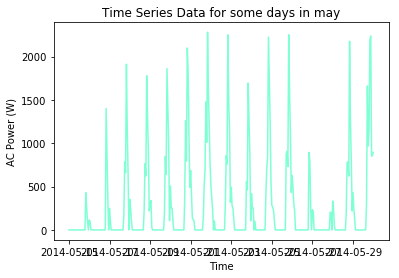

In [3]:
plt.figure()
plt.plot(DF_consumption_Somedayinmay, color="aquamarine")
plt.xlabel("Time")
plt.ylabel("AC Power (W)")
plt.title("Time Series Data for some days in may")
plt.show()

### Info for Temperature

In [4]:
DF_weather = pd.read_csv(path_temperatureFile, sep= ";", index_col=0)
previuousindex_weather= DF_weather.index
NewIndex_weather= pd.to_datetime(previuousindex_weather)
DF_weather.index=NewIndex_weather
DF_weather.columns
Series_Temperature= DF_weather["temperature"]
DF_temperature=DF_weather[["temperature"]]
DF_temperature_Somedayinmay=DF_temperature["2014-05-15  00:00:00" : "2014-05-30  00:00:00"]

### Info for Irradiance 

In [5]:
DF_IrradianceSource=pd.read_csv(path_irradianceFile,sep=";",index_col=1)
previuousindex_irradiance= DF_IrradianceSource.index
NewIndex_irradiance= pd.to_datetime(previuousindex_irradiance)
DF_IrradianceSource.index=NewIndex_irradiance

DF_irradiance_Somedayinmay=DF_IrradianceSource[["gen"]]["2014-05-15  00:00:00" : "2014-05-30  00:00:00"]
DF_irradiance_Somedayinmay["gen"]<0
DF_irradiance_Somedayinmay["gen"][DF_IrradianceSource["gen"]<0]=0

### Subplots for Consumption, Temperature and Irradiance

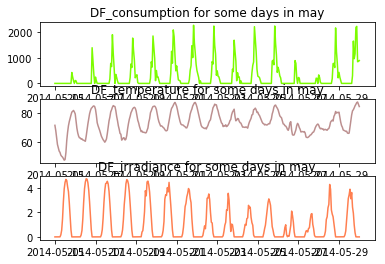

In [6]:
plt.figure()
plt.subplot(3,1,1)
plt.plot(DF_consumption_Somedayinmay,label="DF_consumption",color="lawngreen")
plt.title("DF_consumption for some days in may")
plt.subplot(3,1,2)  
plt.plot(DF_temperature_Somedayinmay, label= "DF_temperature", color="rosybrown")
plt.title("DF_temperature for some days in may")
plt.subplot(3,1,3)  
plt.plot(DF_irradiance_Somedayinmay, label= "DF_irradiance", color="coral")
plt.title("DF_irradiance for some days in may")
plt.show()

## Let's Normalize our variables 

In [7]:
DF_joined= DF_consumption_Somedayinmay.join([DF_temperature_Somedayinmay,DF_irradiance_Somedayinmay])
DF_joined.head()
DF_joined_cleaned=DF_joined.dropna()
temp_min=DF_joined_cleaned["temperature"].min()
temp_max=DF_joined_cleaned["temperature"].max()
DF_joined_cleaned["Temperature Normalized"]=(DF_joined_cleaned["temperature"]-temp_min)/(temp_max-temp_min)
DF_joined_cleaned.head(24)
gen_min=DF_joined_cleaned["gen"].min()
gen_max=DF_joined_cleaned["gen"].max()
DF_joined_cleaned["Generation Normalized"]=(DF_joined_cleaned["gen"]-gen_min)/(gen_max-gen_min)
con_min=DF_joined_cleaned["air conditioner_5545" ].min()
con_max=DF_joined_cleaned["air conditioner_5545"].max()
DF_joined_cleaned["Consumption Normalized"]=(DF_joined_cleaned["air conditioner_5545" ]-con_min)/(con_max-con_min)


### Plotting the variables now normalized and together

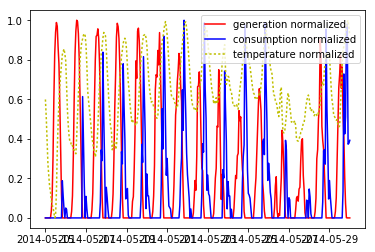

In [8]:
plt.figure()
plt.plot(DF_joined_cleaned["Generation Normalized"], "-r", label="generation normalized")
plt.plot(DF_joined_cleaned["Consumption Normalized"], "-b", label="consumption normalized")
plt.plot(DF_joined_cleaned["Temperature Normalized"], ":y", label="temperature normalized")
plt.legend()
plt.show()